# 画像分類の実装

本章では Python の代表的な画像処理のパッケージである OpenCV や Pillow を用いての基礎的な画像データの取り扱い方法について学び、その後 TensorFlow を用いて Convolutional Neural Network (以下 CNN) の実装方法を確認します。

## 本章の構成  

- 画像処理の基礎
- 画像のクラス分類の実装
- CNN モデルの順伝播の流れ


### GPU の設定

本章では Colab 上の Graphics Processing Unit (以下 GPU) を用いてモデルの学習を行います。GPU を使用するために事前に下記の設定を行っておいて下さい。  

1. GPU のランタイムの設定
![GPU 設定 1](http://drive.google.com/uc?export=view&id=1wVi7zFp1vJnOFxVuKiXa0N5mDWB00hFE)

![GPU 設定 2](http://drive.google.com/uc?export=view&id=1p0ftgj0bRjTgm5L6DxSar5XolowHegxj)

2. ランタイムの再起動
  - 「ランタイム」 → 「ランタイムの再起動」を選択肢、ランタイムの再起動を行います。  




## 画像処理の基礎

OpenCV と Pillow という Python の画像処理パッケージを使用しての基礎的な画像の取り扱い方法について学びます。画像処理には[こちら](https://drive.google.com/file/d/1rRPd3wrXmhfk6SPyT2A_sUgy6CrtjPZ_/view?usp=sharing)の画像を使用します。リンク先の画像の上で右クリックから画像の保存を選択して下さい。  

ダウンロード後、Colab にアップロードを行って下さい。  

In [87]:
from google.colab import files
uploaded = files.upload()

Saving sample.png to sample (1).png


### Pillow の基礎

Pillow は`PIL`という名前で登録されています。モジュールをインポートし、Pillow を用いて画像の読み込みましょう。また、読み込み後み `resize()` メソッドを使用して画像サイズを変更します。  

In [88]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
from PIL import Image

In [90]:
# 画像の読み込み
img = Image.open('sample.png')

Pillow を用いて読み込んだ画像は PngImageFile オブジェクトとなります。  
PngImageFile オブジェクトは画像データであるため、Notebook 上で変数を実行すると画像を表示することが可能です。

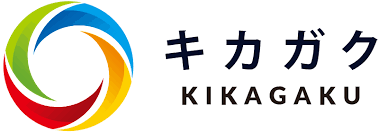

In [91]:
img

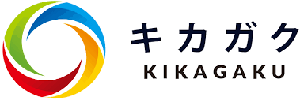

In [92]:
# サイズ変更
img.resize((300, 100))

データの型を確認します。

In [93]:
type(img)

PIL.PngImagePlugin.PngImageFile

Pillow を用いて簡単な画像データ操作について学びます。  
直接このデータ操作は後ほどの CNN の実装とは関係しませんが、基礎的な処理方法を抑えておきましょう。

#### 画像の回転

PngImageFile オブジェクトは様々なメソッドを持ち、簡単に画像処理を適用することができます。画像の回転には `rotate()` メソッドを使用します。引数に回転の角度を取ります。   
CNN モデルの学習の際に使用するデータにノイズ成分を追加する際などに用います。  



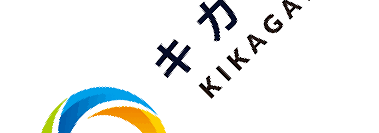

In [94]:
# 画像の回転
img.rotate(45)

#### 画像のクロップ

画像のクロップは `crop()` メソッドを使用します。引数に x 軸の座標、y 軸の座標、横幅、縦幅をとります。

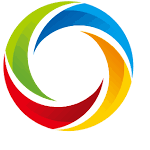

In [95]:
# 画像のクロップ
img.crop((0, 0, 150, 150))

#### NumPy の ndarray オブジェクトに変換

TensorFlow を用いてニューラルネットワークを実装する際のデータは NumPy の ndarray オブジェクトである必要がありました。  

変換は単純に `np.array()` クラスを使用します。  

In [96]:
img_array = np.array(img)

In [97]:
type(img_array)

numpy.ndarray

データの形を確認しましょう。  

In [98]:
img_array.shape

(133, 379)

画像は縦幅 (hegiht) が 400 、横幅 (width) が 300 、チャンネル数 (channel) が 3 となっていることが確認できます。  

それぞれのチャンネルを切り出して、それぞれが red・green・blue であることを確認しましょう。それぞれのチャンネルを切り出し、red のチャンネルを取り出す場合はその他のチャンネルの値を 0 に置き換えます。

In [99]:
img_rgb = img.convert('RGB')
img_array = np.array(img_rgb)
img_array[:, :, 1] *= 0 # blue チャンネルを 0 に
img_array[:, :, 2] *= 0 # green チャンネルを 0 に
img_red = Image.fromarray(img_array) # Pillow の型に変換

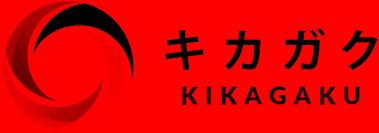

In [100]:
img_red

赤色の画像が取り出すことができました。上記のコードの 0 に置き換えるチャンネルのインデックス番号を変更して、green・blue のチャンネルを抽出した場合もそれぞれ確認しておきましょう。  

Pillow はこの他にも様々な画像データの操作を行うことができます。  
詳細に関してはこちらの[公式ドキュメント](https://pillow.readthedocs.io/en/5.1.x/reference/Image.html)を確認して下さい。  


### OpenCV の基礎

OpenCV は`cv2`という名前で登録されています。Pillow との使用方法は異なりますが、基本的な機能に大きな差異はありません。どちらを使用するかは実際に使用して、使いやすいと思うものを選択して下さい。

In [101]:
import cv2

In [102]:
# 画像の読み込み
img = cv2.imread('sample.png')

OpenCV で読み込んだ画像は NumPy の ndarray 型で読み込まれます。

In [103]:
# 型を確認
type(img)

numpy.ndarray

In [104]:
# サイズの確認
img.shape

(133, 379, 3)

In [105]:
# データ型の確認
img.dtype

dtype('uint8')

`uint8`は unsigned int の略であり、符号なし（正の値のみ）の 8 ビット整数であり、0~255 までを表現可能です。  

OpenCV で読み込んだ画像は **BGR** (Blue, Green, Red) の順で格納されているため、画像の描画を行った際には、青みの強い色合いになります。  

画像の描画には matplotlib の `imshow()` 関数を用います。

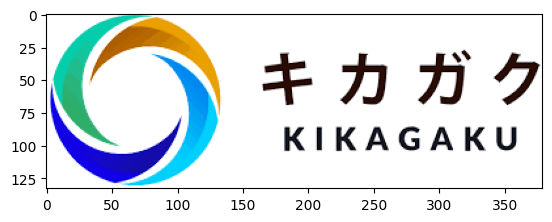

In [106]:
plt.imshow(img)

現在 BGR の順で並んでいるチャンネルの配列を RGB に変換します。変換には `cvtColor()` 関数を用います。引数に `COLOR_BGR2RGB` を用い、BGR → RGB への変換を指定しています。

In [107]:
# BGR -> RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

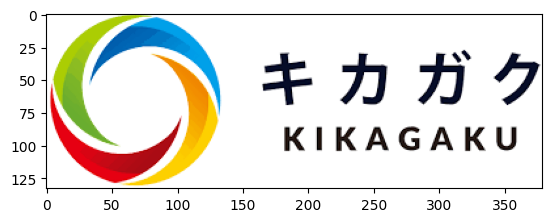

In [108]:
plt.imshow(img_rgb)

Pillow と OpenCV の違いをまとめると下記になります。  

|                  | Pillow                | OpenCV          |
| ---------------- | --------------------- | --------------- |
| **オブジェクト** | Pillow - PngImageFile | NumPy - ndarray |
| **チャンネル**     | RGB                   | BGR             |

Pillow と OpenCV の読み込むチャンネルの順番が異なる点には十分注意しましょう。例えば、学習は OpenCV で行い、推論の際は Pillow を使用するようなケースでは、学習時と推論時でチャンネルの順番が異なるため予測結果が望ましくない事が想定されます。

#### グレースケール変換

代表的な画像の前処理の 1 つであるグレースケール変換を施します。こちらも先程使用した `cvtColor()` 関数を使用します。

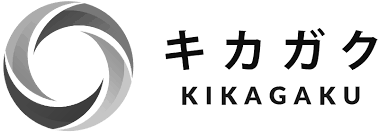

In [109]:
# Pillow
img = Image.open('sample.png').convert('L')
img

In [110]:
# OpenCV
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

matplotlib の`imshow`では、RGBが渡される規定であるため、グレースケールでは変な色合いになってしまいます。描画前に `gray()` 関数を実行しておきましょう。

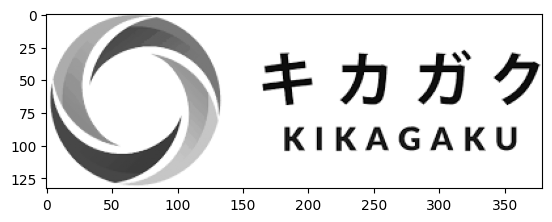

In [111]:
plt.imshow(img_gray, cmap='gray')

グレースケール変換を施したことによって チャンネル数が 3 から 1 になっています。データの形を確認しましょう。

In [112]:
img_gray.shape

(133, 379)

#### エッジ検出

画像内の明るさの変化を検出するエッジ検出の実装を行います。エッジ検出のためのフィルタを準備します。フィルタのことを**カーネル (kernel)**とも呼ぶことも覚えておきましょう。

In [113]:
# エッジ検出のフィルタの定義
kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

エッジ検出のフィルタを画像に適用します。フィルタを画像に適用することを畳み込み (convolution) とも呼びます。  
畳み込みの演算は `filter2D()` 関数を用います。

In [114]:
img_conv = cv2.filter2D(img_gray, -1, kernel)

エッジ検出フィルタ適用後の画像を確認します。

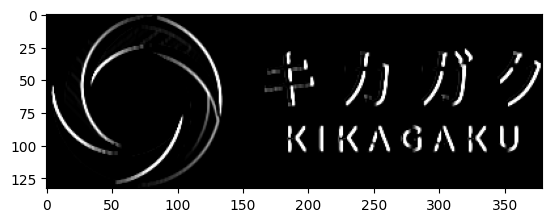

In [115]:
plt.imshow(img_conv, cmap='gray')

横方向に対して、エッジが検出できていることが確認できます。縦方向にもエッジ検出のフィルタを適用してみましょう。


In [116]:
kernel = np.array([
    [-1, -1, -1],
    [  0,  0,  0],
    [  1,  1,  1]
])

In [117]:
img_conv = cv2.filter2D(img_gray, -1, kernel)

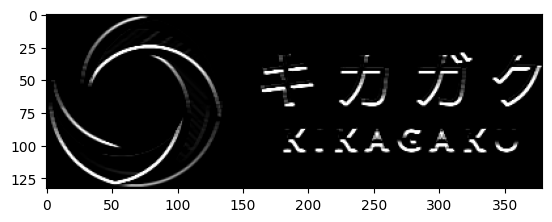

In [118]:
plt.imshow(img_conv, cmap='gray')

先ほどとは異なり、縦方向に輝度の変化量が多い部分が抽出されていることがわかります。特に縦方向の輝度の変化が強い目元を確認すると横方向のエッジ検出のフィルタとの違いが確認することができます。

## 画像のクラス分類の実装

本節では、画像データの基礎的な取り扱い方法を理解した上で、畳み込みニューラルネットワーク (Convolutional Neural Network ; 以下 CNN) の実装を行っていきます。  

今回画像のクラス分類を行う問題設定は 0~9 までの 10 種類の手書き数字になります。使用するデータセットは MNIST と呼ばれるものを使用します。  

![MNIST サンプル](http://drive.google.com/uc?export=view&id=1UN1f-zvpUsnJQOFeJrqSv0or_joH_Gcm)


### データセットの準備

TensorFlow を用いて、CNN を実装する際の画像のデータセットの形式を確認します。画像や自然言語などの非構造化データを取り扱う際にはまず入力値がどのような形式になっているのかを把握することが重要です。  

データセットの読み込みは `tf.keras.datasets.mnist` クラスを用いて取得します。

In [119]:
import tensorflow as tf

GPU が使用可能であるか確認しましょう。  
`name: "/device:GPU:0"` の表示があれば GPU が使用可能な状況となっています。

In [120]:
# GPU が使用可能であることを確認
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12527426679342631766
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2519055911904219444
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [121]:
# データセットの取得
from tensorflow.keras.datasets import mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()

取得したデータセットはすでに TensorFlow を用いて CNN を実装する際に適したデータ形式となっています。データセットの型、データ型、形などを確認し、どのような形式でデータセットを準備する必要があるのか確認していきます。

In [122]:
# サンプル数確認
len(x_train), len(t_train), len(x_test), len(t_test)

(60000, 60000, 10000, 10000)

In [123]:
# サイズ確認
x_train.shape, t_train.shape, x_test.shape, t_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

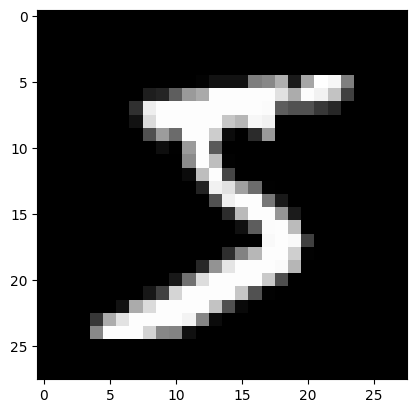

In [124]:
# 1 枚可視化
img = x_train[0]
plt.imshow(img, cmap='gray')

In [125]:
# 目標値確認
t_train[0]

np.uint8(5)

#### TensorFlow で使用できる形式に変換

 画像データの形を (height, width) から (height, width, channel) へと変換します。また画像データの値の正規化を行います。  
 形の変換は `reshape()` メソッドに変換後の形をタプル型で引数に指定します。  
 正規化は uint8 形式のデータの最大値である 255 で割ることで 0~1 の間に変換します。

In [126]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255.0
x_test = x_test.reshape(10000, 28, 28, 1) / 255.0

In [127]:
# チャンネルが追加されていることを確認
x_train[0].shape

(28, 28, 1)

In [128]:
# 正規化されていることを確認
x_train[0].min(), x_train[0].max()

(np.float64(0.0), np.float64(1.0))

最後に入力値は float32 のデータ型に、目標値は int32 のデータ型に変換しておきます。

In [129]:
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
t_train, t_test = t_train.astype('int32'), t_test.astype('int32')

### CNN のモデルの定義

CNN モデルの定義を行います。まず、CNN のモデルの概要を再度確認します。

![CNN モデル](http://drive.google.com/uc?export=view&id=1eDSmSKeLjU-kb-r_F_4JloJPOxrQP0AA)

CNN のモデルは上図のように大きく分けて 3 つの要素からなります。説明に記載されている英字はコードと関連します。  

- 特徴量抽出 : convolution + pooling
  - 画像データからクラス分類などを行う際に使用する特徴量を抽出を行う。
  - 畳み込み (convolution) と縮小 (pooling) を繰り返す。convolution 層を何層追加するのかなどはハイパーパラメータに該当する。
- ベクトル化 : faltten
  - 特徴量抽出後の値をベクトルに変換する。
- 識別 : dense
  - 全結合層、活性化関数を介してクラス分類を行う。  

全体像を把握したところで、モデルの定義を行いましょう。

In [130]:
import os, random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [131]:
from tensorflow.keras import models,layers

# シードの固定
reset_seed(0)

# モデルのインスタンス化
model = models.Sequential()

# モデルの構築
## 特徴量抽出
model.add(layers.Conv2D(filters=3, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) # 畳み込み (convolution) 層
model.add(layers.MaxPooling2D(pool_size=(2, 2))) # pooling 層

## ベクトル化
model.add(layers.Flatten())

## 識別
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


モデルの定義が完了しました。`summary()` メソッドでパラメータを確認します。  

In [132]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 507)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        50,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,840 (202.50 KB)

 Trainable params: 51,840 (202.50 KB)

 Non-trainable params: 0 (0.00 B)

1 層目の `conv2d` のパラメータの数が $30$ となっています。何故この値なのか確認します。  

- カーネルのサイズ : $3\times3$
- 入力のチャンネル数 : $1$
- 出力のチャンネル数 : $3$
- 重みの数 : $(3\times3)\times1\times3 = 27$
- バイアスの数 : $3$
- 合計のパラメータの数 : $27+3 = 30$

前章で学んだ数学と同じようにパラメータ数があることが確認できました。  注意点として、今回入力値の画像は 1 チャンネルのものを使用していますが、このチャンネル数が 3 になった場合は、重みの数は 3 倍多くなります。  

構造のプロットも行います。

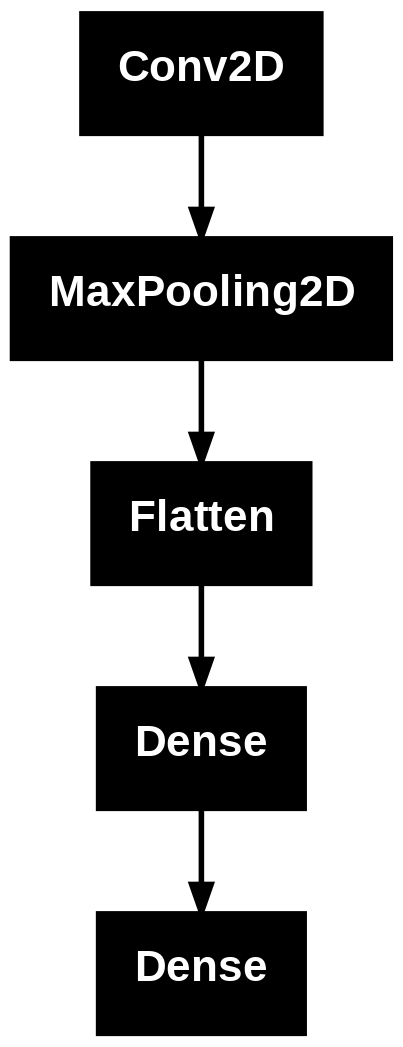

In [133]:
from tensorflow.keras.utils import plot_model
plot_model(model)

今回は非常にシンプルな CNN のモデルを定義しました。精度向上のためには、特徴量抽出の部分の convolution 層や pooling 層の数を調整したり、全結合層の層やノードの数を調整します。  

### 目的関数と最適化手法の選択

今回は最適化の手法に Adam を、目的関数は分類の問題設定のため sparse categorical crossentropy を使用します。

In [134]:
# optimizerの設定
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# モデルのコンパイル
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### モデルの学習

バッチサイズ、エポック数を定義して、モデルの学習を実行します。

In [135]:
# 学習の実行
history = model.fit(x_train, t_train,
                    batch_size=4096,
                    epochs=30,
                    validation_data=(x_test, t_test))

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.5822 - loss: 1.3240 - val_accuracy: 0.8953 - val_loss: 0.3752
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8993 - loss: 0.3582 - val_accuracy: 0.9240 - val_loss: 0.2556
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9238 - loss: 0.2587 - val_accuracy: 0.9375 - val_loss: 0.2019
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9373 - loss: 0.2068 - val_accuracy: 0.9459 - val_loss: 0.1707
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9485 - loss: 0.1709 - val_accuracy: 0.9560 - val_loss: 0.1452
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9562 - loss: 0.1443 - val_accuracy: 0.9616 - val_loss: 0.1297
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9618 - loss: 0.1261 - val_accuracy: 0.9658 - val_loss: 0.1181
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9658 - loss: 0.1124 - val_accuracy: 0.9674 - 

今回は GPU を使用して学習を行いました。GPU のメモリの使用率は下記の `!nvidia-smi` コマンドを実行します。  

`Memory-Usage` の欄を確認すると`1121MiB / 16280MiB` のように現在どの程度メモリを専有しているか確認できます。  

経験的にバッチサイズはこのメモリを可能な限り使用できる大きさに調整することが多いです。

In [136]:
!nvidia-smi

Mon Jun 23 14:29:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P0             33W /   70W |    1146MiB /  15360MiB |     30%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### 予測精度の評価

学習結果を確認します。

In [137]:
results = pd.DataFrame(history.history)
results.tail(3)

,accuracy,loss,val_accuracy,val_loss
27,0.986117,0.041911,0.9780,0.072316
28,0.989150,0.032629,0.9794,0.069905
29,0.992600,0.023929,0.9782,0.074911


Text(0.5, 0, 'epochs')

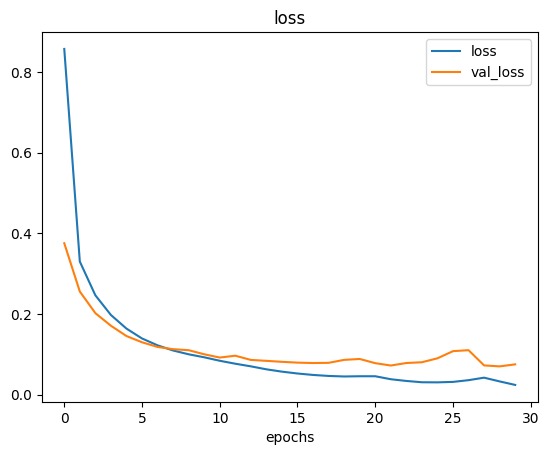

In [138]:
# 損失を可視化
results[['loss', 'val_loss']].plot(title='loss')
plt.xlabel('epochs')


Text(0.5, 0, 'epochs')

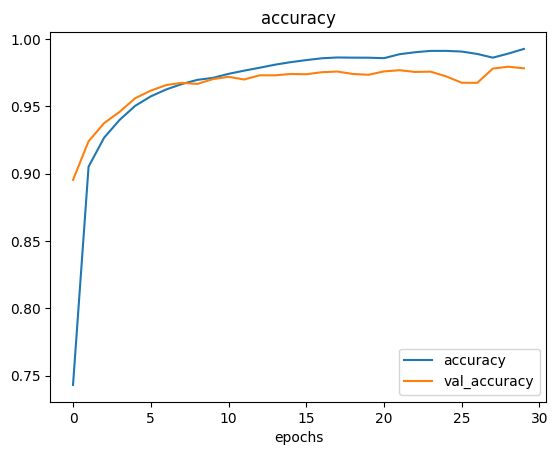

In [139]:
# 正解率を可視化
results[['accuracy', 'val_accuracy']].plot(title='accuracy')
plt.xlabel('epochs')

損失が下がり、正解率も 95% を超えており、予測精度としては悪くない事が確認できます。続いては実装の中身を分解して確認します。

## CNN モデルの順伝播の流れ

構築した CNN モデルの計算の中身を確認していきます。  
入力画像が特徴抽出からベクトル化にかけてどのように変化しているのかを簡単に確認します。

In [140]:
# 推論に使用するデータを切り出し + バッチサイズの追加
x_new = np.array([x_train[0]])
x_new.shape

(1, 28, 28, 1)

学習済みモデルの層は `layers` 属性から取得することができ、層のインデックス番号を使用すると特定の層の取り出しを行うことが可能です。  

In [141]:
model.layers

[<Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_3, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>]

切り出した重みの取得には `get_weights()` メソッドを用います。

In [142]:
model.layers[0].get_weights()

[array([[[[-0.5007588 , -0.16746575,  0.0232721 ]],
 
         [[-1.0199239 ,  0.21345523, -0.7014376 ]],
 
         [[ 0.4506219 ,  0.41690126, -0.27722144]]],
 
 
        [[[-0.76718307,  0.46902633,  0.10786379]],
 
         [[ 0.1459632 ,  0.29646185, -0.14200886]],
 
         [[ 0.7185651 ,  0.13451366,  0.59218603]]],
 
 
        [[[-0.9550461 , -0.40016747,  0.4572233 ]],
 
         [[ 0.4883498 ,  0.27070522,  0.59950453]],
 
         [[ 0.40291455,  0.5047785 , -0.17691027]]]], dtype=float32),
 array([ 0.03033607, -0.05330791, -0.01107489], dtype=float32)]

### convolution 層の計算

切り出した層に値を渡すことによって計算を行うことができます。1 層目の convolution 層の計算を実行し、出力データを画像として可視化してみましょう。  

In [143]:
output = model.layers[0](x_new) # convolution 層の計算
output = output[0].numpy() # NumPy の ndarray オブジェクトに変換

今回の convolution 層のフィルタの数は 3 でした。そのため、出力されるデータのチャンネル数は 3 になります。それぞれのチャンネル毎に可視化を行います。

In [178]:
output.shape

(23, 23, 5)

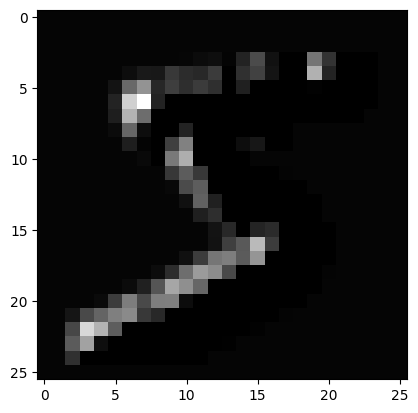

In [145]:
# 1 つ目の出力
plt.imshow(output[:, :, 0], cmap='gray')

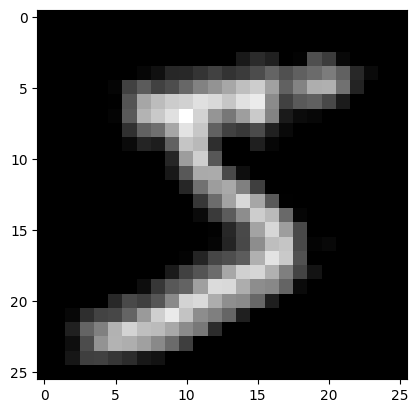

In [146]:
# 2 つ目の出力
plt.imshow(output[:, :, 1], cmap='gray')

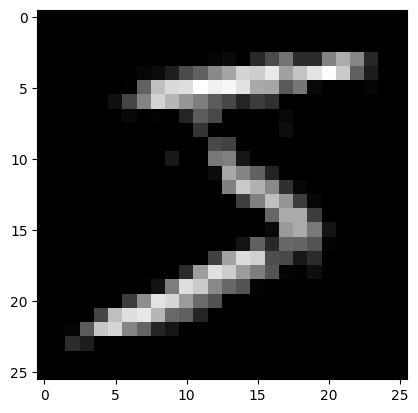

In [147]:
# 3 つ目の出力
plt.imshow(output[:, :, 2], cmap='gray')

それぞれ個別のフィルタが適用され、異なる出力が確認できます。この画像から人間側がどのような特徴を抽出しているか理解することは少し困難ですが、前章で学んだ数学の処理が施されている事が確認できます。

### pooling 層の計算

pooling 層の計算を確認します。pooling サイズが 2x2 だったため、出力のサイズは 1/2 になります。  

In [148]:
output = model.layers[0](x_new) # convolution 層の計算
output = model.layers[1](output) # pooling 層の計算（サイズを 1/2 に変換）
output = output[0].numpy()

In [149]:
output.shape

(13, 13, 3)

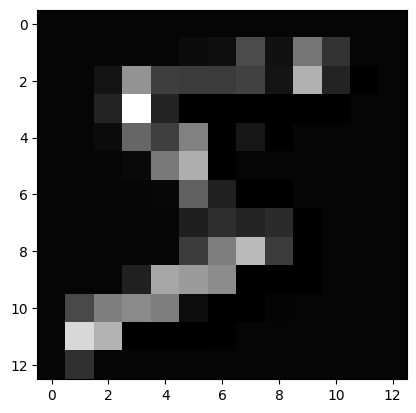

In [150]:
# 1 つ目の出力
plt.imshow(output[:, :, 0], cmap='gray')

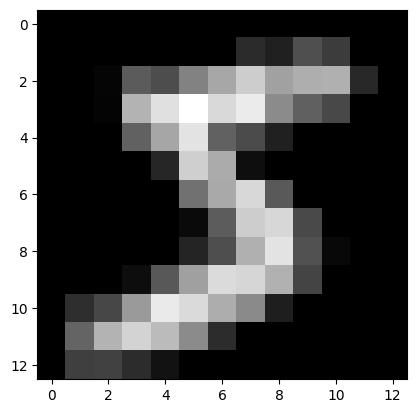

In [151]:
# ２つ目の出力
plt.imshow(output[:, :, 1], cmap='gray');

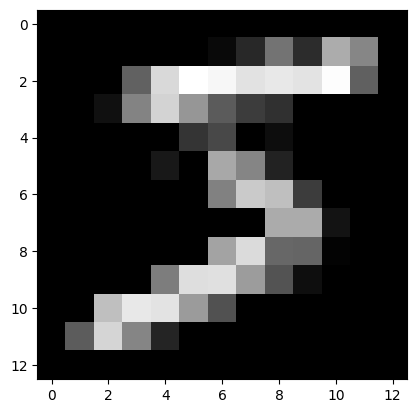

In [152]:
# 3つ目の出力
plt.imshow(output[:, :, 2], cmap='gray');

### ベクトル化

先程の出力の形は 13, 13, 3 になります。全ての値の数の合計は $13\times13\times3 = 507$ となります。実際に 507 次元のベクトルに変換されていることを確認しましょう。

In [153]:
output = model.layers[0](x_new) # convolution 層の計算
output = model.layers[1](output) # pooling 層の計算（サイズを 1/2 に変換）
output = model.layers[2](output) # ベクトル化
output = output[0].numpy()

In [154]:
output.shape

(507,)

## 練習問題 本章のまとめ

本章で学んだ内容を復習しましょう。下記の内容を次のセルに記述し、実行結果を確認してください。（必要に応じてセルの追加を行ってください。）  

CNN モデルのハイパーパラメータ調整を行い、予測精度にどのような変化があるのか確認して下さい。  

*ハイパーパラメータ調整のポイント*

- convolution 層の数
- カーネルサイズ
- パディング
- pooling 層の数
- pooling のサイズ
- バッチノーマリゼーション層の追加
- 全結合層のノード・層の数
- 最適化手法

*発展*  
- 学習済みモデルの convolution 層を切り出し、計算を行い、出力結果を確認して下さい。

In [171]:
# モデルの定義
import os, random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

from tensorflow.keras import models,layers

# シードの固定
reset_seed(0)

# モデルのインスタンス化
model = models.Sequential()

# モデルの構築
## 特徴量抽出
model.add(layers.Conv2D(filters=5, kernel_size=(6, 6), activation='relu', input_shape=(28, 28, 1))) # 畳み込み (convolution) 層
model.add(layers.MaxPooling2D(pool_size=(4, 4))) # pooling 層

## ベクトル化
model.add(layers.Flatten())

## 識別
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 23, 23, 5)      │           185 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        12,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,795 (53.89 KB)

 Trainable params: 13,795 (53.89 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
# 目的関数と最適化手法の選択
# optimizerの設定
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# モデルのコンパイル
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [173]:
# モデルの学習
history = model.fit(x_train, t_train,
                    batch_size=720,
                    epochs=30,
                    validation_data=(x_test, t_test))

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7480 - loss: 0.8326 - val_accuracy: 0.9616 - val_loss: 0.1344
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9585 - loss: 0.1396 - val_accuracy: 0.9724 - val_loss: 0.0903
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9709 - loss: 0.0959 - val_accuracy: 0.9770 - val_loss: 0.0733
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9768 - loss: 0.0763 - val_accuracy: 0.9798 - val_loss: 0.0674
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9798 - loss: 0.0667 - val_accuracy: 0.9804 - val_loss: 0.0622
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9821 - loss: 0.0585 - val_accuracy: 0.9835 - val_loss: 0.0566
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9850 - loss: 0.0498 - val_accuracy: 0.9831 - val_loss: 0.0554
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9873 - loss: 0.0435 - val_accuracy: 0.9825 - val_loss

Text(0.5, 0, 'epochs')

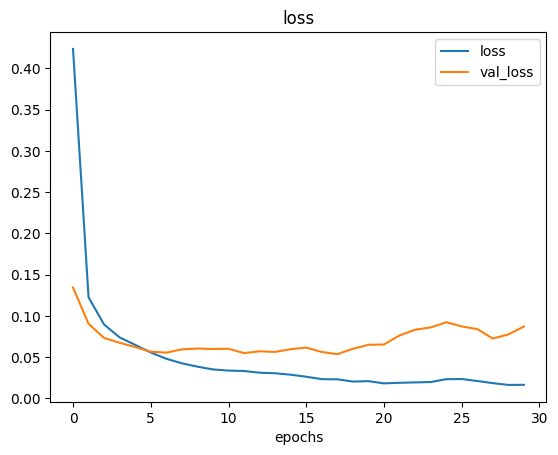

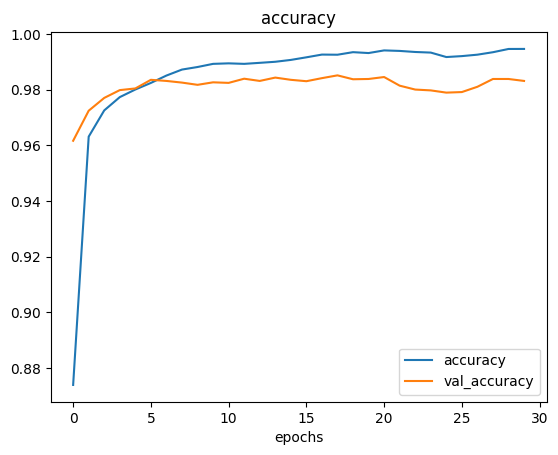

In [174]:
# 予測精度の評価
results = pd.DataFrame(history.history)
results.tail(3)

# 損失を可視化
results[['loss', 'val_loss']].plot(title='loss')
plt.xlabel('epochs')
# 正解率を可視化
results[['accuracy', 'val_accuracy']].plot(title='accuracy')
plt.xlabel('epochs')

In [180]:
# convolution 層の出力の確認
output = model.layers[0](x_new) # convolution 層の計算
output = output[0].numpy() # NumPy の ndarray オブジェクトに変換

output.shape

(23, 23, 5)

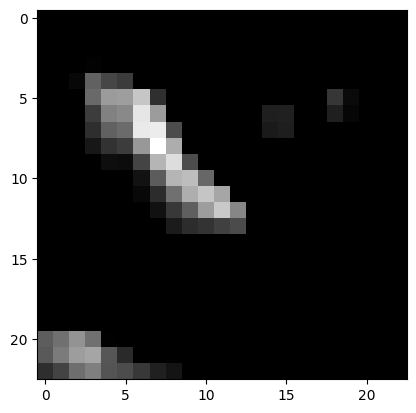

In [181]:
# 1 つ目の出力
plt.imshow(output[:, :, 0], cmap='gray')

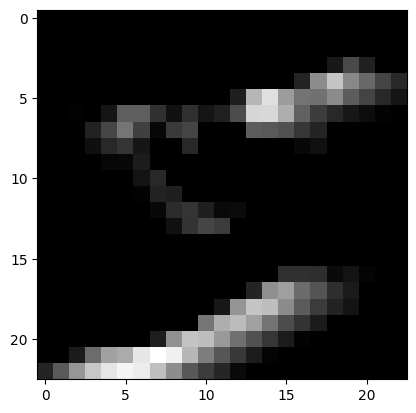

In [176]:
# ２つ目の出力
plt.imshow(output[:, :, 1], cmap='gray')

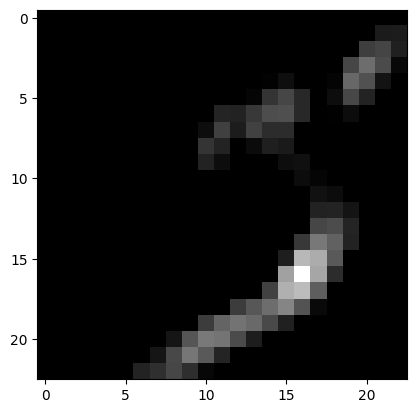

In [177]:
# 3 つ目の出力
plt.imshow(output[:, :, 2], cmap='gray')

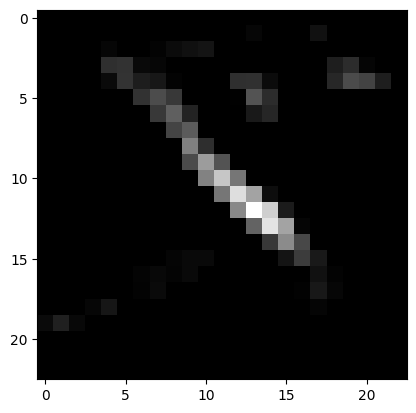

In [182]:
# 4 つ目の出力
plt.imshow(output[:, :, 3], cmap='gray')

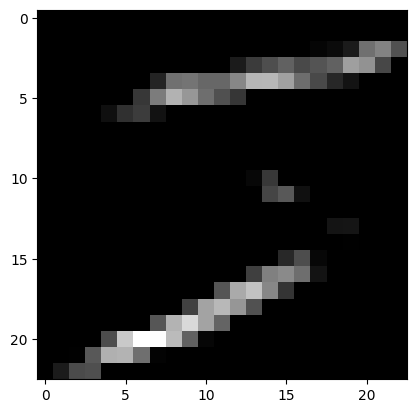

In [183]:
# 5 つ目の出力
plt.imshow(output[:, :, 4], cmap='gray')

---
© 株式会社キカガク及び国立大学法人 豊橋技術科学大学